Integral from 0 to 5000 is:  1.016


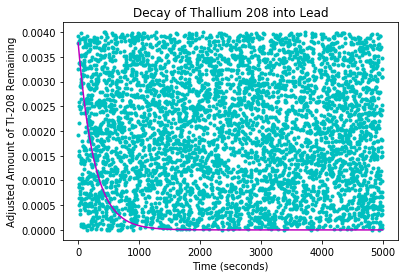

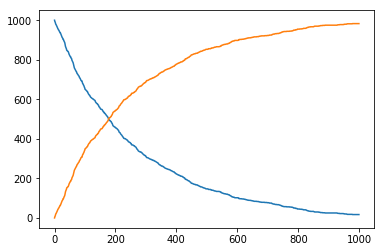

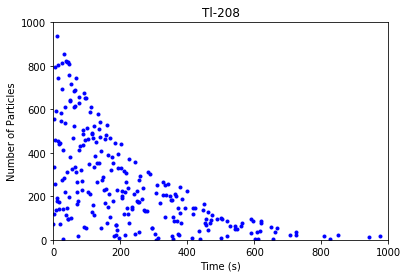

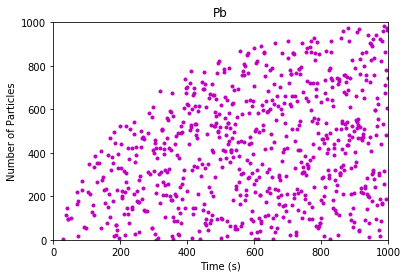

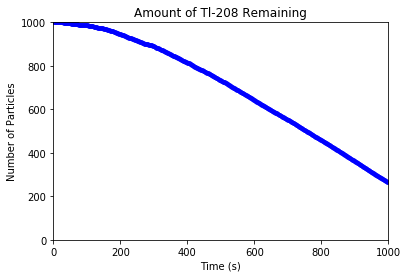

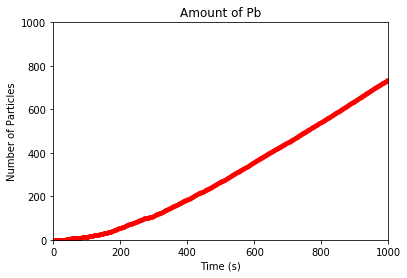

In [12]:
#10.4: Radioactive decay again
#Redo the calculation from Example 10.1, but this time using the
#faster method described in the preceding section. 

#Using the transformation method, 
#generate 1000 random numbers from the nonuniform distribution of 
#Eq. (10.5) to represent the times of decay of 1000 atoms of 208Tl 
#(which has half-life 3.053 minutes(183.3 seconds)). Then make a plot showing the
#number of atoms that have not decayed as a function of time, i.e., 
#a plot as a function of t showing the number of atoms whose chosen
#decay times are greater than t.

import numpy as np
import math
import matplotlib.pyplot as plt
from random import random

#Half Life Tau (in seconds):
Tau=183.18
Points=5000

t=np.linspace(0,5000,Points)
P=np.zeros(len(t))

Adjusted_P=0

def DecayTl208(Time_Value):
    Adjusted_P=(2**(-(Time_Value)/Tau)*(math.log(2)/Tau))
    return Adjusted_P

for i in range(len(t)):
    P[i]=(2**(-t[i]/Tau)*(math.log(2)/Tau))

x_MonteCarlo=np.zeros(Points)
y_MonteCarlo=np.zeros(Points)

for i in range(Points):
    x_MonteCarlo[i]=np.random.uniform(0,5000)
    y_MonteCarlo[i]=np.random.uniform(0,0.004)

Monte_Sum=0    
Decays_x=np.zeros(Points)

for i in range(Points):
    if(y_MonteCarlo[i]<=DecayTl208(x_MonteCarlo[i])):
        Monte_Sum=Monte_Sum+1
#        plt.plot(x_MonteCarlo[i],y_MonteCarlo[i],"m.")
        Decays_x[Monte_Sum]=x_MonteCarlo[Monte_Sum]
        
    else:
        Monte_Sum=Monte_Sum+0
#        plt.plot(x_MonteCarlo[i],y_MonteCarlo[i],"c.")
        
print("Integral from 0 to 5000","is: ",20*Monte_Sum/Points)
#5000*0.004 is 20, then divide by N# of points

#Chosen_Decays=np.zeros(1000)

#for i in range(0,999):
#    if(Decays_x[i]!=0):
#        Chosen_Decays[i]=Decays_x[i]

#print(np.around(Chosen_Decays,1))

plt.plot(x_MonteCarlo,y_MonteCarlo,"c.")
plt.plot(t,P,"m-")
plt.title("Decay of Thallium 208 into Lead")
plt.xlabel("Time (seconds)")
plt.ylabel("Adjusted Amount of Tl-208 Remaining")
plt.show()

NTl=1000
NPb=0
h=1
p=1-2**(-h/Tau)
tmax=1000

tpoints=np.arange(0,tmax,h)
Tlpoints=[]
Pbpoints=[]

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    decay=0
    for i in range(NTl):
        if (random()<p):
            decay+=1
    NTl-=decay
    NPb+=decay
    
plt.plot(tpoints,Tlpoints)
plt.plot(tpoints,Pbpoints)
plt.show()

#print(Tlpoints)
#print(Pbpoints)

The_Array=np.zeros(tmax)
#The_Second_Array=np.zeros(tmax)

for i in range(1000):
    The_Array[i]=np.random.uniform(0,1000)
#    The_Second_Array[i]=np.random.uniform(0,1000)

for i in range(tmax):
    if(The_Array[i]<=Tlpoints[i]):
        plt.plot(tpoints[i],The_Array[i],'b.')
plt.xlim(0,1000)
plt.xlabel("Time (s)")
plt.ylim(0,1000)
plt.ylabel("Number of Particles")
plt.title("Tl-208")
plt.show()

for i in range(tmax):
    if(The_Array[i]<=Pbpoints[i]):
        plt.plot(tpoints[i],The_Array[i],'m.')
plt.xlim(0,1000)
plt.xlabel("Time (s)")
plt.ylim(0,1000)
plt.ylabel("Number of Particles")
plt.title("Pb")
plt.show()

Tl_count=1000
Pb_count=0

Tl_counter=np.zeros(1000)
Pb_counter=np.zeros(1000)

for i in range(tmax):
    if(The_Array[i]<=Pbpoints[i]):
        Tl_count-=1
        Tl_counter[i]=Tl_count
    else:
        Tl_count+=0
        Tl_counter[i]=Tl_count
plt.plot(tpoints,Tl_counter,'b.')
plt.xlabel("Time (s)")
plt.ylabel("Number of Particles")
plt.title("Amount of Tl-208 Remaining")
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

#The_Array=np.zeros(tmax)

#for i in range(tmax):
#    if(The_Array[i]<=Tlpoints[i]):
#        Pb_count+=1
#        Pb_counter[i]=Pb_count
#    else:
#        Pb_count+=0
#        Pb_counter[i]=Pb_count
for i in range(tmax):
    Pb_counter[i]=1000-Tl_counter[i]
    
plt.plot(tpoints,Pb_counter,'r.')
plt.xlabel("Time (s)")
plt.ylabel("Number of Particles")
plt.title("Amount of Pb")
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

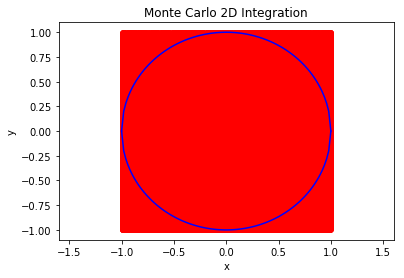

Area:  3.143572
Hypersphere volume: 2.557952
Percent deviation:  -0.30554945572041753 %


In [11]:
#10.7: Volume of a hypersphere

import numpy as np
import math
import matplotlib.pyplot as plt

N=1000000

x=np.zeros(N)
y=np.zeros(N)

#2D Monte Carlo method for area of sphere:

Sum_Part=0

for i in range(N):
    x[i]=np.random.uniform(-1,1)
    y[i]=np.random.uniform(-1,1)
    
plt.plot(x,y,"r.")
plt.title("Monte Carlo 2D Integration")
plt.xlim(-1.6,1.6)
plt.xlabel("x")
plt.ylabel("y")

x1=np.linspace(-1,1,100)
y1=np.zeros(len(x1))
for i in range(len(x1)):
    y1[i]=math.sqrt(1-(x1[i]**2))

plt.plot(x1,y1,"b-")
plt.plot(x1,-y1,"b-")

plt.show()

for i in range(N):
    if(x[i]**2+y[i]**2<=1):
        Sum_Part=Sum_Part+1
    else:
        Sum_Part=Sum_Part+0

print("Area: ",4*Sum_Part/N)

#10D hypersphere "volume": 

Hyper_Sum_Part=0

dim1=np.zeros(N)
dim2=np.zeros(N)
dim3=np.zeros(N)
dim4=np.zeros(N)
dim5=np.zeros(N)
dim6=np.zeros(N)
dim7=np.zeros(N)
dim8=np.zeros(N)
dim9=np.zeros(N)
dim10=np.zeros(N)

for i in range(N):
    dim1[i]=np.random.uniform(-1,1)
    dim2[i]=np.random.uniform(-1,1)
    dim3[i]=np.random.uniform(-1,1)
    dim4[i]=np.random.uniform(-1,1)
    dim5[i]=np.random.uniform(-1,1)
    dim6[i]=np.random.uniform(-1,1)
    dim7[i]=np.random.uniform(-1,1)
    dim8[i]=np.random.uniform(-1,1)
    dim9[i]=np.random.uniform(-1,1)
    dim10[i]=np.random.uniform(-1,1)
    
for i in range(N):
    if(dim1[i]**2+
       dim2[i]**2+
       dim3[i]**2+
       dim4[i]**2+
       dim5[i]**2+
       dim6[i]**2+
       dim7[i]**2+
       dim8[i]**2+
       dim9[i]**2+
       dim10[i]**2<=1):
        Hyper_Sum_Part=Hyper_Sum_Part+1
    else:
        Hyper_Sum_Part=Hyper_Sum_Part+0

print("Hypersphere volume:",1024*Hyper_Sum_Part/N)
print("Percent deviation: ",100*(2.55016-(1024*Hyper_Sum_Part/N))/2.55016,"%")

Area by Trapezoidal method:  4.50656


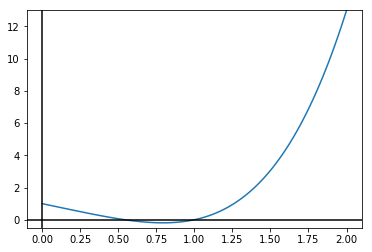

N=10:  4.400426666666667
N=100:  4.400000042666668
N=1000:  4.400000000004267


In [6]:
#Newman 5.2
#Simpson’s rule. Simpson’s rule involves fitting quadratic curves to pairs of
#slices and then calculating the area under the quadratics.

import numpy as np
import math
import matplotlib.pyplot as plt

# Simple Trapezoidal Integration:

def f(x):
    return (x**4) - (2*x) + 1

# Number of trapezoids:
N = 10
# Bounds of integration:
a = 0.0
b = 2.0
# Width of each trapezoid:
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a+k*h)

Sum=h*s
print("Area by Trapezoidal method: ",Sum)

# Simpson's Rule:

function_x=np.zeros(100)

for i in range(100):
    function_x[i]=f(np.linspace(0,2,100)[i])

plt.plot(np.linspace(0,2,100),function_x)
plt.axhline(color="black")
plt.axvline(color="black")
plt.ylim(-0.5,13)
plt.show()

base=f(a)+f(b)

sum1=0
sum2=0

for i in range(1,N):
    if(i%2==1 or i==1):
        sum1+=f(a+i*h)
    elif(i%2==0):
        sum2+=f(a+i*h)

print("N=10: ",(h/3)*(base+(4*sum1)+(2*sum2)))        

N=100
h = (b-a)/N
sum1=0
sum2=0
for i in range(1,N):
    if(i%2==1 or i==1):
        sum1+=f(a+i*h)
    elif(i%2==0):
        sum2+=f(a+i*h)

print("N=100: ",(h/3)*(base+(4*sum1)+(2*sum2)))

N=1000
h = (b-a)/N
sum1=0
sum2=0
for i in range(1,N):
    if(i%2==1 or i==1):
        sum1+=f(a+i*h)
    elif(i%2==0):
        sum2+=f(a+i*h)
        
print("N=1000: ",(h/3)*(base+(4*sum1)+(2*sum2)))    